In [14]:
import csv
# import openslide
# from openslide import ImageSlide, open_slide
import os
import glob
import re
import pandas as pd
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import random
import staintools

In [2]:
train_path = "/home/ubuntu/working/data3/"
images = {}
labels = {}
img_names = [] 
labels_index=[1, 1, 2,2, 0]

labels_Map=["Normal", "EE", "Celiac"]
files = glob.glob(os.path.join(train_path, '*.svs'))
for fl in files:
    flbase = os.path.basename(fl)
    flbase_noext = os.path.splitext(flbase)[0]
    images[flbase_noext]=fl 

In [3]:
ee_image_path = images['130382-6718_001']
cd = images['C17-83_04']
op_img = open_slide(ee_image_path)
imgEE = op_img.read_region((2000,2000),0, (1000,1000))

op_img2 = open_slide(cd)
imgCD = op_img2.read_region((5000,5000),0, (1000,1000))



In [262]:
PATH = "../data_segments/data_balanced_duplicate_sample/"
files = os.listdir(f'{PATH}valid/EE')[:10]
fn = f'{PATH}valid/EE/{files[2]}'
# flags = cv2.IMREAD_UNCHANGED+cv2.IMREAD_ANYDEPTH+cv2.IMREAD_ANYCOLOR
# imgEE = cv2.imread(str(fn), flags).astype(np.float32)
# imgEE = cv2.cvtColor(imgEE, cv2.COLOR_BGR2RGB)
imgEE = staintools.read_image(str(fn))
imgEE = cv2.cvtColor(imgEE, cv2.COLOR_BGR2RGB)

In [263]:
files

['130368_6720_001_5772_777_0.jpg',
 '116_3652_3652_0.jpg',
 '130375_6727_001_4100_2500_0.jpg',
 '130364_6715_001_6216_1221_0.jpg',
 '130368_6720_001_7000_11200_0.jpg',
 '130366_6717_001_5400_4900_0.jpg',
 '130366_6717_001_11800_8500_0.jpg',
 '130364_6715_001_555_7437_0.jpg',
 '130364_6715_001_300_8100_0.jpg',
 '130366_6717_001_2442_3885_0.jpg']

In [270]:
standardizer = staintools.BrightnessStandardizer()
color_normalizer = staintools.StainNormalizer(method='vahadane')
i1 = staintools.read_image("../data_segments/data_balanced_duplicate_sample/valid/EE/130366_6717_001_2442_3885_0.jpg")
#                 i1 = cv2.convertScaleAbs(i1)
i1_standard = standardizer.transform(i1)
color_normalizer.fit(i1_standard)

In [271]:

i2_standard = standardizer.transform(imgEE)
i2_standard_normalized = color_normalizer.transform(i2_standard)
im = i2_standard_normalized.astype(np.float32)/255

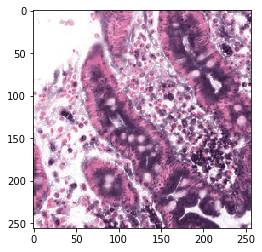

In [272]:
plt.imshow(im,shape=(256,256))

In [94]:
plt.imshow(imgCD,shape=(256,256))

NameError: name 'imgCD' is not defined

In [162]:
# alpha = 1.1
# beta = 0
# image = n.array(imgEE)
# im = imgEE
# new_image = np.zeros(image.shape, image.dtype)
# for y in range(image.shape[0]):
#     for x in range(image.shape[1]):
#         for c in range(image.shape[2]):
#             new_image[y,x,c] = np.clip(alpha*image[y,x,c] + beta, 0, 255)
            
hue_delta = random.uniform(-0.04, 0.04)
saturation_delta = random.uniform(0, 0.4)
value_delta = random.uniform(-0.25, 0.25)

image = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)

print(hue_delta)
print(saturation_delta)
print(value_delta)

std_hue = image[:, :, 0].std()
image[:, :, 0]  =  image[:, :, 0] + 2.5*hue_delta*std_hue

std_saturation = image[:, :, 1].std()
image[:, :, 1]  =  image[:, :, 1] + 2*saturation_delta*std_saturation

std_value = image[:, :, 2].std()
image[:, :, 2]  =  image[:, :, 2] + 2.5*value_delta*std_value

img = cv2.cvtColor(image, cv2.COLOR_HSV2RGB)
# cv2.imshow('image',out)
# k = cv2.waitKey(0)
# cv2.destroyAllWindows()

0.02860928440018754
0.17935574106943086
0.026618556127988968


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


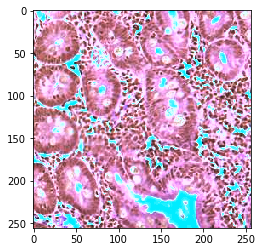

In [163]:
plt.imshow(img,shape=(256,256))
# image = np.array(imgEE)
# std1 = image[:, :, 1].std()
# std1

In [158]:
contrast = random.randint(-4, 8)
contrast = (contrast*5)/255

img = img * (contrast/127+1) - contrast
img = np.clip(img, 0, 1)


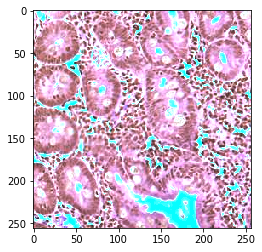

In [159]:
plt.imshow(img,shape=(256,256))

In [256]:
contrast*255

0.0

In [285]:
clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8,8))
lab = cv2.cvtColor(out, cv2.COLOR_BGR2LAB)  # convert from BGR to LAB color space
l, a, b = cv2.split(lab)  # split on 3 different channels
l2 = clahe.apply(l)  # apply CLAHE to the L-channel
lab = cv2.merge((l2,a,b))  # merge channels
img_arr2 = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

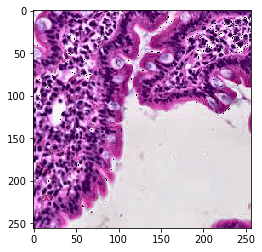

In [286]:
plt.imshow(img_arr2,shape=(256,256))

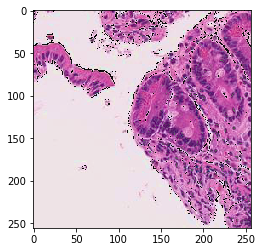

In [53]:
out3 = adjust_gamma(out,random.uniform(0.5, 2))

plt.imshow(out3,shape=(256,256))

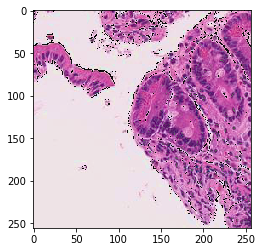

In [54]:
plt.imshow(out3,shape=(256,256))

In [6]:
# alpha = 1.1
# beta = 0
image = np.array(imgEE)
# new_image = np.zeros(image.shape, image.dtype)
# for y in range(image.shape[0]):
#     for x in range(image.shape[1]):
#         for c in range(image.shape[2]):
#             new_image[y,x,c] = np.clip(alpha*image[y,x,c] + beta, 0, 255)
            
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

std1 = image[:, :, 2].std()
image[:, :, 2]  =  image[:, :, 2] + 0.25*std1

std1 = image[:, :, 1].std()
image[:, :, 1]  =  image[:, :, 1] + 0.75*std1
std1 = image[:, :, 0].std()
image[:, :, 0]  =  image[:, :, 0] + 0.04*std1

out = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
# cv2.imshow('image',out)
# k = cv2.waitKey(0)
# cv2.destroyAllWindows()

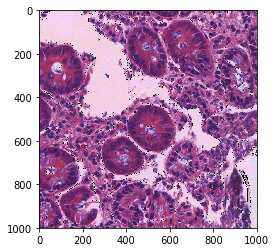

In [20]:
plt.imshow(out,shape=(256,256))

In [21]:
def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

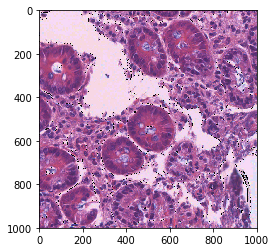

In [34]:
out2 = adjust_gamma(out,random.uniform(0.5, 2))

plt.imshow(out2,shape=(256,256))

In [231]:
clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(8,8))
lab = cv2.cvtColor(out, cv2.COLOR_BGR2LAB)  # convert from BGR to LAB color space
l, a, b = cv2.split(lab)  # split on 3 different channels
l2 = clahe.apply(l)  # apply CLAHE to the L-channel
lab = cv2.merge((l2,a,b))  # merge channels
img_arr2 = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

error: OpenCV(3.4.3) /io/opencv/modules/imgproc/src/clahe.cpp:351: error: (-215:Assertion failed) _src.type() == CV_8UC1 || _src.type() == CV_16UC1 in function 'apply'


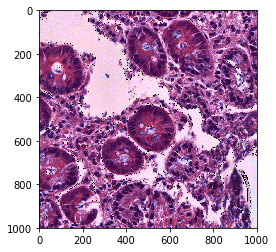

In [40]:
plt.imshow(img_arr2,shape=(256,256))

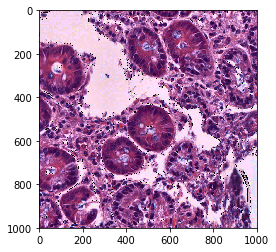

In [42]:
out2 = adjust_gamma(img_arr2,random.uniform(0.5, 2))

plt.imshow(out2,shape=(256,256))

In [11]:
img_ref = Image.fromarray(img_arr2, 'RGB')
arr = [img, img_ref]
arr[0]

NameError: name 'img' is not defined

In [ ]:
arr[1]

In [ ]:
cv2.imwrite('clahe_2.jpg',l2)